In [91]:
# ! python -c "import pykeen" || pip install git+https://github.com/pykeen/pykeen.git
# pykeen.env()

In [92]:
import os
import pandas as pd
import numpy as np

print(os.getcwd())
base_dir = f"{os.getcwd()}"

/Users/ferran/PhD/yaleCollab


# Explore PyKEEN and default data

In [93]:
# import pandas as pd

# from pykeen.triples import TriplesFactory
# from pykeen.pipeline import pipeline
# from pykeen.datasets.nations import NATIONS_TRAIN_PATH

# tf = TriplesFactory.from_path(NATIONS_TRAIN_PATH)

# print(NATIONS_TRAIN_PATH)
# print(tf)

# # training, testing = tf.split()

# # result = pipeline(

# #     training=training,

# #     testing=testing,

# #     model='TransE',

# #     epochs=5,  # short epochs for testing - you should go higher

# # )

# # result.save_to_directory('doctests/test_unstratified_transe')

In [94]:
# pd.read_csv('/usr/local/lib/python3.9/site-packages/pykeen/datasets/nations/train.txt', sep='\t')

Format data for PYKEEN is in the form of a TSV file with the (h,r,t) format.
THis means that the edges are indeed directed.

WEe can now take either one of two approaches:

- Use STRING database ass a proof of concept. All of these interactions will be considered as @signsallnig interactions. KG will end up having 2 types of edges: those from strign and those from cellchat
- Proper approach with the Functional INteraction network from reactome. Here interaction edges can be of different types, and string comprehension will have to be built to decode the direction column into individual triplets with the (h,r,t) format

## RPY2 cheatsheet

Using R from Python

In [95]:
# import rpy2
# import rpy2.situation
# for row in rpy2.situation.iter_info(): # Print Rpy2 info
#     print(row)

# from rpy2.robjects.packages import importr
# base = importr("base")
# here = importr("here")

# if here.here()[0] != base_dir:
#     raise ValueError

In [96]:
# from rpy2.robjects.packages import importr
# base = importr("base")
# here = importr("here")

# INTepi21 = base.readRDS(here.here("CRCTME_story/Integration_CRCTME-Aug21/RData",
# "INTepi21_filt_2022.rds"))
# INTepi21

Load R chunks

In [97]:
# %load_ext rpy2.ipython

In [98]:
# %%R
# R.version.string

In [99]:
# %%R -i INTepi21
# library(base)
# library(tidyverse)
# library(Seurat)
# library(here)

# INTepi21

# STRING + CellchatDB KGE

In [100]:
import rpy2
import rpy2.situation
for row in rpy2.situation.iter_info(): # Print Rpy2 info
    print(row)

from rpy2.robjects.packages import importr
base = importr("base")
here = importr("here")

if here.here()[0] != base_dir:
    raise ValueError

from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

rpy2 version:
3.4.5
Python version:
3.9.13 (main, Aug  7 2022, 01:33:23) 
[Clang 13.1.6 (clang-1316.0.21.2.5)]
Looking for R's HOME:
    Environment variable R_HOME: /usr/local/Cellar/r/4.2.1_2/lib/R
    Calling `R RHOME`: /usr/local/Cellar/r/4.2.1_2/lib/R
    Environment variable R_LIBS_USER: None
R's additions to LD_LIBRARY_PATH:
/usr/local/lib/R/library/stats/libs/
R version:
    In the PATH: R version 4.2.1 (2022-06-23) -- "Funny-Looking Kid"
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:
  include:
  ['/usr/local/Cellar/r/4.2.1_2/lib/R/include']
  libraries:
  ['R', 'pcre2-8', 'lzma', 'bz2', 'z', 'icucore', 'dl', 'm', 'iconv']
  library_dirs:
  ['/usr/local/opt/gettext/lib', '/usr/local/opt/readline/lib', '/usr/local/opt/xz/lib', '/usr/local/lib', '/usr/local/opt/gettext/lib', '/usr/local/opt/readline/lib', '/usr/local/opt/xz/lib', '/usr/local/lib', '/usr/local/Cellar/r/4.2.1_2/lib/R/lib', '/usr/local/Cellar/pcre2/

Download cellchat DB with the following:

`wget https://github.com/sqjin/CellChat/raw/master/data/CellChatDB.mouse.rda`

TO use in the cloud, ahve logic that looks for local file, if not present, try to download with ipynb cloud !bash notation and if it fails (for reasons or because user is local) just prompt to download from URL.

In [101]:
r["load"]("CellChatDB.mouse.rda")

ccDB_mouse = r["CellChatDB.mouse"]
ccDB_mouse[0]

,interaction_name,pathway_name,ligand,receptor,agonist,antagonist,co_A_receptor,co_I_receptor,evidence,annotation,interaction_name_2
TGFB1_TGFBR1_TGFBR2,TGFB1_TGFBR1_TGFBR2,TGFb,Tgfb1,TGFbR1_R2,TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb1 - (Tgfbr1+Tgfbr2)
TGFB2_TGFBR1_TGFBR2,TGFB2_TGFBR1_TGFBR2,TGFb,Tgfb2,TGFbR1_R2,TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb2 - (Tgfbr1+Tgfbr2)
TGFB3_TGFBR1_TGFBR2,TGFB3_TGFBR1_TGFBR2,TGFb,Tgfb3,TGFbR1_R2,TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb3 - (Tgfbr1+Tgfbr2)
TGFB1_ACVR1B_TGFBR2,TGFB1_ACVR1B_TGFBR2,TGFb,Tgfb1,ACVR1B_TGFbR2,TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,PMID: 27449815,Secreted Signaling,Tgfb1 - (Acvr1b+Tgfbr2)
TGFB1_ACVR1C_TGFBR2,TGFB1_ACVR1C_TGFBR2,TGFb,Tgfb1,ACVR1C_TGFbR2,TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,PMID: 27449815,Secreted Signaling,Tgfb1 - (Acvr1c+Tgfbr2)
...,...,...,...,...,...,...,...,...,...,...,...
TIGIT_PVR,TIGIT_PVR,TIGIT,Tigit,Pvr,,,,,PMID:24987108,Cell-Cell Contact,Tigit - Pvr
ITGA4_ITGB1_VCAM1,ITGA4_ITGB1_VCAM1,VCAM,ITGA4_ITGB1,Vcam1,,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga4+Itgb1)
ITGA9_ITGB1_VCAM1,ITGA9_ITGB1_VCAM1,VCAM,ITGA9_ITGB1,Vcam1,,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga9+Itgb1)
ITGA4_ITGB7_VCAM1,ITGA4_ITGB7_VCAM1,VCAM,ITGA4_ITGB7,Vcam1,,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga4+Itgb7)


In [102]:
ccDB_mouse[3]

,Symbol,Name,EntrezGene.ID,Ensembl.Gene.ID,HomoloGene.ID,HGNC.ID
MGI:87853,a,nonagouti,50518,ENSMUSG00000027596,1264,HGNC:745
MGI:87854,Pzp,"PZP, alpha-2-macroglobulin like",11287,ENSMUSG00000030359,104112,null
MGI:87859,Abl1,"c-abl oncogene 1, non-receptor tyrosine kinase",11350,ENSMUSG00000026842,3783,HGNC:76
MGI:87860,Abl2,v-abl Abelson murine leukemia viral oncogene 2...,11352,ENSMUSG00000026596,5278,HGNC:77
MGI:87862,Scgb1b27,"secretoglobin, family 1B, member 27",11354,ENSMUSG00000066583,114479,null
...,...,...,...,...,...,...
MGI:1913728,Cd99,CD99 antigen,673094,,48107,HGNC:7082
MGI:96876,Klra,"killer cell lectin-like receptor, subfamily A",17055,,,HGNC:6372
MGI:1891386,Ccl21c,chemokine (C-C motif) ligand 21C (leucine),111654,,,HGNC:10620
MGI:107670,Ifna,interferon alpha,4663,,,


In [103]:
#Print ligands and receptors
dCellChat = ccDB_mouse[0]

ligands = [str(x.split(" - ")[0].strip()) for x in dCellChat["interaction_name_2"]]

receptors = [x.split(" - ")[1][1:-1].strip().split("+") if "+" in x 
                else str(x.split(" - ")[1].strip()) 
            for x in dCellChat["interaction_name_2"]]
#Nested list for coreceptors, otherwise store as string

dCellChat["ligand"] = ligands
dCellChat["receptor"] = receptors

dCellChat

,interaction_name,pathway_name,ligand,receptor,agonist,antagonist,co_A_receptor,co_I_receptor,evidence,annotation,interaction_name_2
TGFB1_TGFBR1_TGFBR2,TGFB1_TGFBR1_TGFBR2,TGFb,Tgfb1,"[Tgfbr1, Tgfbr2]",TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb1 - (Tgfbr1+Tgfbr2)
TGFB2_TGFBR1_TGFBR2,TGFB2_TGFBR1_TGFBR2,TGFb,Tgfb2,"[Tgfbr1, Tgfbr2]",TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb2 - (Tgfbr1+Tgfbr2)
TGFB3_TGFBR1_TGFBR2,TGFB3_TGFBR1_TGFBR2,TGFb,Tgfb3,"[Tgfbr1, Tgfbr2]",TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,KEGG: mmu04350,Secreted Signaling,Tgfb3 - (Tgfbr1+Tgfbr2)
TGFB1_ACVR1B_TGFBR2,TGFB1_ACVR1B_TGFBR2,TGFb,Tgfb1,"[Acvr1b, Tgfbr2]",TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,PMID: 27449815,Secreted Signaling,Tgfb1 - (Acvr1b+Tgfbr2)
TGFB1_ACVR1C_TGFBR2,TGFB1_ACVR1C_TGFBR2,TGFb,Tgfb1,"[Acvr1c, Tgfbr2]",TGFb agonist,TGFb antagonist,,TGFb inhibition receptor,PMID: 27449815,Secreted Signaling,Tgfb1 - (Acvr1c+Tgfbr2)
...,...,...,...,...,...,...,...,...,...,...,...
TIGIT_PVR,TIGIT_PVR,TIGIT,Tigit,Pvr,,,,,PMID:24987108,Cell-Cell Contact,Tigit - Pvr
ITGA4_ITGB1_VCAM1,ITGA4_ITGB1_VCAM1,VCAM,Vcam1,"[Itga4, Itgb1]",,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga4+Itgb1)
ITGA9_ITGB1_VCAM1,ITGA9_ITGB1_VCAM1,VCAM,Vcam1,"[Itga9, Itgb1]",,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga9+Itgb1)
ITGA4_ITGB7_VCAM1,ITGA4_ITGB7_VCAM1,VCAM,Vcam1,"[Itga4, Itgb7]",,,,,KEGG: mmu04514,Cell-Cell Contact,Vcam1 - (Itga4+Itgb7)


In [104]:
#Pivot longer the correceptors
df = []
#Apply more efficient parsing than iterrows?
for i in dCellChat.iterrows():
    if type(i[1]["receptor"]) is list: #ONly iterate over lists (coreceptors)
        for r in i[1]["receptor"]:#i[1] to get data, not index
            df.append([i[1]["ligand"], "LRinteraction", r, 
                        i[1]["pathway_name"]])
    else:
        df.append([i[1]["ligand"], "LRinteraction", i[1]["receptor"], 
                    i[1]["pathway_name"]])

dCellChat = pd.DataFrame(df, 
                columns=["head","relation","tail","pathway"]
                ).drop_duplicates() 
    #Drop duplicates arising from receptor/coreceptor undefinition
dCellChat

,head,relation,tail,pathway
0,Tgfb1,LRinteraction,Tgfbr1,TGFb
1,Tgfb1,LRinteraction,Tgfbr2,TGFb
2,Tgfb2,LRinteraction,Tgfbr1,TGFb
3,Tgfb2,LRinteraction,Tgfbr2,TGFb
4,Tgfb3,LRinteraction,Tgfbr1,TGFb
...,...,...,...,...
2935,Vcam1,LRinteraction,Itga4,VCAM
2936,Vcam1,LRinteraction,Itgb1,VCAM
2937,Vcam1,LRinteraction,Itga9,VCAM
2940,Vcam1,LRinteraction,Itgb7,VCAM


Download STRING database using the following:
 - Murine: `wget https://stringdb-static.org/download/protein.links.v11.5/10090.protein.links.v11.5.txt.gz`
 - Human: `wget https://stringdb-static.org/download/protein.links.v11.5/9606.protein.links.v11.5.txt.gz`

Don't forget to gunzip afterwards. Also, like with the celllchatDB, this could potentially be automated as a bash pipe.

In [105]:
dSTRING = pd.read_csv("murineSTRING.txt", sep=" ")
dSTRING

,protein1,protein2,combined_score
0,10090.ENSMUSP00000000001,10090.ENSMUSP00000031145,161
1,10090.ENSMUSP00000000001,10090.ENSMUSP00000071486,208
2,10090.ENSMUSP00000000001,10090.ENSMUSP00000119330,183
3,10090.ENSMUSP00000000001,10090.ENSMUSP00000066449,259
4,10090.ENSMUSP00000000001,10090.ENSMUSP00000061539,229
...,...,...,...
14496353,10090.ENSMUSP00000141183,10090.ENSMUSP00000130793,150
14496354,10090.ENSMUSP00000141183,10090.ENSMUSP00000135905,150
14496355,10090.ENSMUSP00000141183,10090.ENSMUSP00000139505,248
14496356,10090.ENSMUSP00000141183,10090.ENSMUSP00000048340,211


In [106]:
dSTRING.shape[0]

14496358

In [107]:
#Make dataframe with (h,r,t) format for high confidence interactions (>700 score)
df = dSTRING.loc[dSTRING["combined_score"]>700, ["protein1","protein2"]]

dSTRING = pd.DataFrame({"head": df["protein1"].str.extract(pat=r"\.(.+$)",
                                                expand=False),
                        "relation": np.repeat("FIstring", df.shape[0]),
                        "tail":df["protein2"].str.extract(pat=r"\.(.+$)",
                                                expand=False)
                        })
dSTRING

,head,relation,tail
13,ENSMUSP00000000001,FIstring,ENSMUSP00000062392
49,ENSMUSP00000000001,FIstring,ENSMUSP00000027603
53,ENSMUSP00000000001,FIstring,ENSMUSP00000029482
70,ENSMUSP00000000001,FIstring,ENSMUSP00000080162
86,ENSMUSP00000000001,FIstring,ENSMUSP00000053818
...,...,...,...
14495803,ENSMUSP00000141166,FIstring,ENSMUSP00000075242
14495849,ENSMUSP00000141166,FIstring,ENSMUSP00000029871
14495897,ENSMUSP00000141166,FIstring,ENSMUSP00000025083
14495916,ENSMUSP00000141166,FIstring,ENSMUSP00000036438


Use biomart to go from ENSEMBL PROTEIN IDs to gene symbols.
NO need to get interspecies orthologues as both genes and protein DBs are murine.

In [108]:
from biomart import BiomartServer

In [109]:
#Function this?

server = BiomartServer("http://useast.ensembl.org/biomart")
server.verbose = True

mart = server.datasets["mmusculus_gene_ensembl"]

# #Below gets list of embslID for string nodes, but request fails due to too many items in filter
# query_items = list(pd.concat([dSTRING["head"],dSTRING["tail"]]).drop_duplicates())

# response = mart.search({"attributes":["ensembl_peptide_id","mgi_symbol"],
#                         "filters": {"ensembl_peptide_id":query_items}})
# response


#Dumb approach
response = mart.search({"attributes":["ensembl_peptide_id","mgi_symbol"]})

transDF = []

for line in response.raw.data.decode("utf-8").splitlines():
    line = line.split("\t")
    if len(line[0]) > 0: #Only get gene symbols with ENSP ID
        transDF.append(line)

transDF = pd.DataFrame(transDF, 
                columns=["ensembl_peptide_id","mgi_symbol"]
                ).drop_duplicates() 


[BiomartServer:'http://useast.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://useast.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 107'] Fetching datasets
[BiomartDatabase:'Mouse strains 107'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 107'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 107'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 107'] Fetching datasets
[BiomartDataset:'mmusculus_gene_ensembl'] Searching using following params:
{'attributes': ['ensembl_peptide_id', 'mgi_symbol']}
[BiomartDataset:'mmusculus_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="mmusculus_gene_ensembl" interface="default"><Attribute name="ensembl_peptide_id" /><Attribute nam

In [110]:
transDF

,ensembl_peptide_id,mgi_symbol
0,ENSMUSP00000080991,mt-Nd1
1,ENSMUSP00000080992,mt-Nd2
2,ENSMUSP00000080993,mt-Co1
3,ENSMUSP00000080994,mt-Co2
4,ENSMUSP00000080995,mt-Atp8
...,...,...
67147,ENSMUSP00000129592,Ptprj
67148,ENSMUSP00000159520,Kynu
67149,ENSMUSP00000028223,Kynu
67150,ENSMUSP00000108445,Kynu


Apply translation dataframe to dSTRING:

In [111]:
transDict = transDF.set_index("ensembl_peptide_id"
                ).to_dict(
                    #Transform DF into a dictionary but first set index
                )["mgi_symbol"]#Nested dict, so get first (and only item)
transDict

{'ENSMUSP00000080991': 'mt-Nd1',
 'ENSMUSP00000080992': 'mt-Nd2',
 'ENSMUSP00000080993': 'mt-Co1',
 'ENSMUSP00000080994': 'mt-Co2',
 'ENSMUSP00000080995': 'mt-Atp8',
 'ENSMUSP00000080996': 'mt-Atp6',
 'ENSMUSP00000080997': 'mt-Co3',
 'ENSMUSP00000080998': 'mt-Nd3',
 'ENSMUSP00000081021': 'mt-Nd4l',
 'ENSMUSP00000081000': 'mt-Nd4',
 'ENSMUSP00000081001': 'mt-Nd5',
 'ENSMUSP00000081002': 'mt-Nd6',
 'ENSMUSP00000081003': 'mt-Cytb',
 'ENSMUSP00000136543': '',
 'ENSMUSP00000137004': '',
 'ENSMUSP00000094625': '',
 'ENSMUSP00000136117': '',
 'ENSMUSP00000136877': '',
 'ENSMUSP00000107053': '',
 'ENSMUSP00000136885': '',
 'ENSMUSP00000136941': '',
 'ENSMUSP00000095098': '',
 'ENSMUSP00000111587': '',
 'ENSMUSP00000135921': '',
 'ENSMUSP00000129755': '',
 'ENSMUSP00000136630': '',
 'ENSMUSP00000106995': '',
 'ENSMUSP00000096850': '',
 'ENSMUSP00000111594': '',
 'ENSMUSP00000136930': '',
 'ENSMUSP00000137612': '',
 'ENSMUSP00000136325': '',
 'ENSMUSP00000111591': '',
 'ENSMUSP00000136452': '',


Update dSTRING. Current gene symbol method instroduces NaN:

- Remove for now.
- Future use ENSBLID for genes and peptides, as we will have 2 types of nodes

In [112]:
dSTRING["head"] = dSTRING["head"].map(transDict)
dSTRING["tail"] = dSTRING["tail"].map(transDict)

In [113]:
print(dSTRING.shape)
dSTRING.dropna(inplace=True)
dSTRING

(464754, 3)


,head,relation,tail
13,Gnai3,FIstring,Prkca
49,Gnai3,FIstring,Rgs18
53,Gnai3,FIstring,Gpsm2
70,Gnai3,FIstring,Adrb3
86,Gnai3,FIstring,Gnat2
...,...,...,...
14495803,Gm28635,FIstring,Arhgap35
14495849,Gm28635,FIstring,Cdh17
14495897,Gm28635,FIstring,Kif5b
14495916,Gm28635,FIstring,Tjp3


In [114]:
print(dCellChat.shape)
dCellChat.dropna(inplace=True)
dCellChat

(2063, 4)


,head,relation,tail,pathway
0,Tgfb1,LRinteraction,Tgfbr1,TGFb
1,Tgfb1,LRinteraction,Tgfbr2,TGFb
2,Tgfb2,LRinteraction,Tgfbr1,TGFb
3,Tgfb2,LRinteraction,Tgfbr2,TGFb
4,Tgfb3,LRinteraction,Tgfbr1,TGFb
...,...,...,...,...
2935,Vcam1,LRinteraction,Itga4,VCAM
2936,Vcam1,LRinteraction,Itgb1,VCAM
2937,Vcam1,LRinteraction,Itga9,VCAM
2940,Vcam1,LRinteraction,Itgb7,VCAM


Save processed database, individually and as one.

In [115]:
dSTRING.to_csv("dSTRING.tsv", sep="\t", index=False)
dCellChat.to_csv("dCellChat.tsv", sep="\t", index=False)

In [173]:
dINT = pd.concat([dCellChat, dSTRING]).drop_duplicates()
dINT

,head,relation,tail,pathway
0,Tgfb1,LRinteraction,Tgfbr1,TGFb
1,Tgfb1,LRinteraction,Tgfbr2,TGFb
2,Tgfb2,LRinteraction,Tgfbr1,TGFb
3,Tgfb2,LRinteraction,Tgfbr2,TGFb
4,Tgfb3,LRinteraction,Tgfbr1,TGFb
...,...,...,...,...
14495803,Gm28635,FIstring,Arhgap35,NaN
14495849,Gm28635,FIstring,Cdh17,NaN
14495897,Gm28635,FIstring,Kif5b,NaN
14495916,Gm28635,FIstring,Tjp3,NaN


In [176]:
dINT.to_csv("dINT.tsv", sep="\t", index=False)
#BEWARE of header being save. If imported directly into pykeen it will think there's extra nodes/relations

In [177]:
dINT.drop("pathway", axis=1).to_csv("dINT_simpl.tsv", sep="\t", index=False, header=False)

# Constructing the Knowledge Graph Embedding

In [121]:
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory

Use train/test and validation splits for early stopping

In [178]:
path2Data = "dINT_simpl.tsv"

tf = TriplesFactory.from_path(path2Data)
tf

TriplesFactory(num_entities=16232, num_relations=2, create_inverse_triples=False, num_triples=439023, path="/Users/ferran/PhD/yaleCollab/dINT_simpl.tsv")

## Use defaults and 50 dimensional embedding spaces

In [179]:
%%time

training, testing, validation = tf.split([.8, .1, .1])

result = pipeline(
    training=training,
    testing=testing,
    validation=validation,
    model="TransE",
    stopper="early",
    epochs=10,  # short epochs for testing - you should go
                # higher, especially with early stopper enabled
                
)

result.save_to_directory("one50_unstratified_stopped_transe")

INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [334990, 43902, 43903]
INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.stoppers.early_stopping:Inferred checkpoint path for best model weights: /Users/ferran/.data/pykeen/checkpoints/best-model-weights-345b8a5b-7930-4188-a6d5-d6796e980adf.pt
Training epochs on cpu:  90%|█████████ | 9/10 [01:40<00:10, 10.05s/epoch, loss=0.0192, prev_loss=0.0214]INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 336.55s seconds
INFO:pykeen.stoppers.early_stopping:New best result at epoch 10: 0.3566384985080746. Saved model weights to /Users/ferran/.data/pykeen/checkpoints/best-model-weights-345b8a5b-7930-4188-a6d5-d6796e980adf.pt
INFO:pykeen.training.training_

CPU times: user 12min 20s, sys: 51.9 s, total: 13min 12s
Wall time: 13min 11s


TransE(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(16232, 50)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(2, 50)
    )
  )
  (weight_regularizers): ModuleList()
)


<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

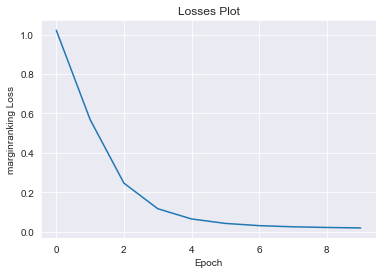

In [183]:
#model used TransE has only one representation for entities and relations, 
# so modules objects will be of length 1
print(result.model)
result.plot_losses()

In [184]:
from typing import List
import pykeen.nn

entity_representation_modules: List['pykeen.nn.Representation'] = result.model.entity_representations
relation_representation_modules: List['pykeen.nn.Representation'] = result.model.relation_representations

In [185]:
entity_embeddings: pykeen.nn.Embedding = entity_representation_modules[0]
relation_embeddings: pykeen.nn.Embedding = relation_representation_modules[0]

In [186]:
print(entity_embeddings)
print(relation_embeddings)

Embedding(
  (_embeddings): Embedding(16232, 50)
)
Embedding(
  (_embeddings): Embedding(2, 50)
)


In [187]:
import torch

In [188]:
#Access embeddings by index (default arg returns all)
entity_embedding_tensor: torch.FloatTensor = entity_embeddings(indices=None)
relation_embedding_tensor: torch.FloatTensor = relation_embeddings(indices=None)

In [189]:
entcount = 0
for i in entity_embedding_tensor:
    entcount+=1
print(f"We have {entcount} entities embedded on {len(i)} dimensions")

relcount = 0
for i in relation_embedding_tensor:
    relcount+=1
print(f"We have {relcount} relations embedded on {len(i)} dimensions")

We have 16232 entities embedded on 50 dimensions
We have 2 relations embedded on 50 dimensions


I don't understand why we have 3 types of relations, when the input data should only have 2!:

* FIXED!: THis was happening because I forgot to rmv the header....

In [190]:
dINT["relation"].unique()

array(['LRinteraction', 'FIstring'], dtype=object)

Model should have been saved within one50... dir.
For future uses during development,  reload this default model. Later on, once we have added our own data or if prelim results are unsatisfactory, optimize methods and hyperparam.

# DR, clustering and visualisation

Now that we have a 50D KGE representing our data we can apply DR to generate a 2D space on which to visualise the entitites/nodes.

Furthermore, we should be able to cluster them and colour by cluster too. Hopefully there should be some overlap btwn the unsupervised clusters and pathway (biological/functional) annotations